<a href="https://colab.research.google.com/github/Mohan1github/ML_projects/blob/main/Gold_predcition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
gold_data = pd.read_csv("/content/sample_data/gld_price_data.csv")
print(gold_data)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [6]:
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Axes: >

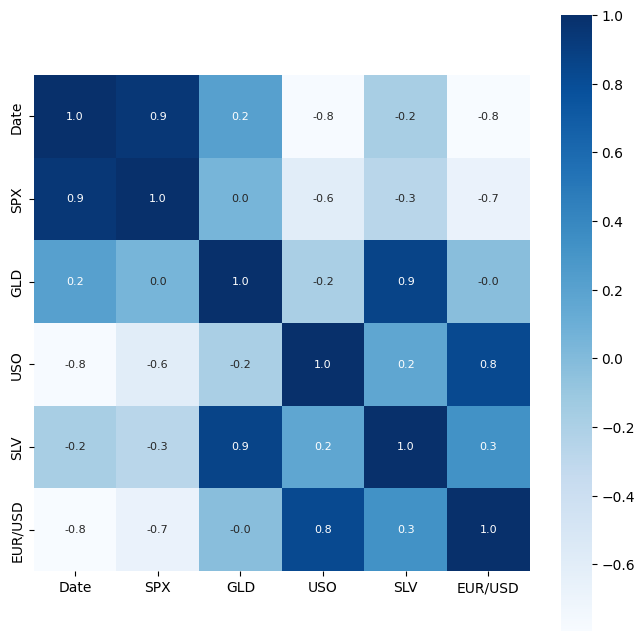

In [14]:
gold_data["Date"] = pd.to_datetime(gold_data["Date"])
plt.figure(figsize = (8,8))
sns.heatmap(gold_data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


<ipython-input-17-d3557fb2e95c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"], color = "skyblue")


<Axes: xlabel='GLD', ylabel='Density'>

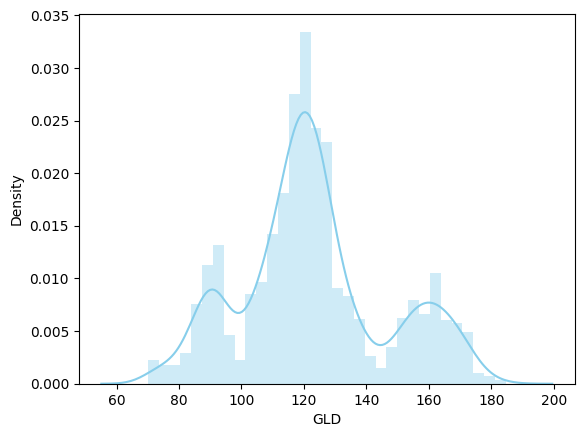

In [17]:
sns.distplot(gold_data["GLD"], color = "skyblue")

In [18]:
# data splitting
x = gold_data.drop(["Date","GLD"],axis = 1)
y = gold_data["GLD"]
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 3)
print(x_train)

              SPX        USO        SLV   EUR/USD
1581  2107.780029  18.490000  15.580000  1.117905
2172  2584.840088  11.380000  16.090000  1.166113
985   1313.719971  29.799999  26.709999  1.250469
1267  1733.150024  36.380001  21.049999  1.366699
2042  2341.590088  10.040000  17.150000  1.086095
...           ...        ...        ...       ...
789   1120.760010  31.780001  38.439999  1.412469
968   1318.859985  34.090000  27.049999  1.256124
1667  2067.639893  15.650000  13.920000  1.109004
1688  1913.849976  14.810000  13.940000  1.129344
1898  2185.790039  10.210000  18.959999  1.113908

[1832 rows x 4 columns]


In [22]:
# instant of the model
regressor = RandomForestRegressor(n_estimators = 100)
print(regressor)
regressor.fit(x_train,y_train)

RandomForestRegressor()


RandomForestRegressor()

In [24]:
#prediction on the test data regressor
test_data = regressor.predict(x_test)
print(test_data)

[164.23819942 127.50799912 124.2956997  119.80669871 125.98229908
  86.27269829 171.72250172 137.0979     107.04510058 133.10210132
 120.60549926 124.94620026 143.35409802 104.55580015  81.04259894
 119.73659997 140.73740029  90.1484005   91.49029914 128.33250189
 125.58139914 147.40060003 116.54210164 153.13129956 129.44559953
 129.68900054 117.8464012  111.38290011 167.42520263 156.6020985
 126.01480184 154.02830169 127.08859937 122.81259761 116.34080137
 154.59509968 115.16699997 120.5171015  104.13390222 105.62580044
 134.49089924  85.81509977 156.91510134 120.91019997 122.28370067
 155.31710093 120.47700032 116.56409972 168.77230249 116.31770051
 137.85560247 162.06279869 158.49990063 153.33920016 124.01330027
 117.15090006 167.2354006  117.31899955 165.66040037  84.23739981
 121.35769903 122.1141001  119.85809994 171.95789964 119.22299918
 180.03729651 161.56050195 137.16830334 115.97019978  92.62970058
 171.86620045 117.7741001  117.83149861 125.47960068 147.42669937
  90.998700

In [26]:
error = metrics.r2_score(y_test,test_data)
print("R squared error : ", error)

R squared error :  0.9849919464070975


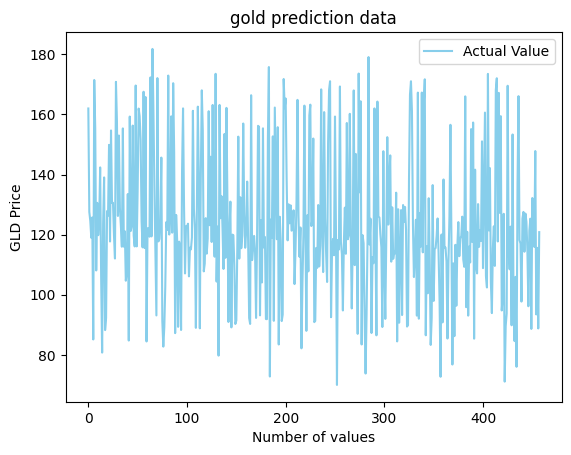

In [28]:
Y_test = list(y_test)
plt.plot(Y_test ,color="skyblue", label = "Actual Value")
plt.title("gold prediction data")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

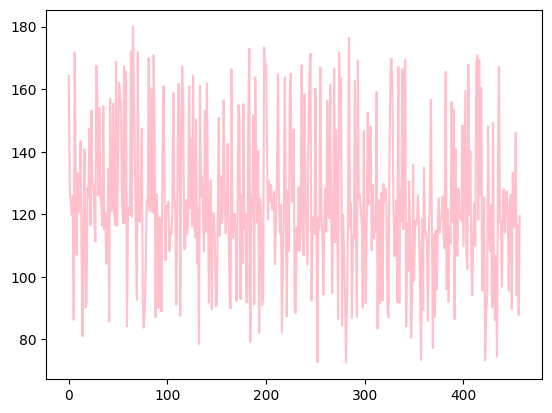

In [31]:
plt.plot(test_data ,color="pink", label = "Actual Value")